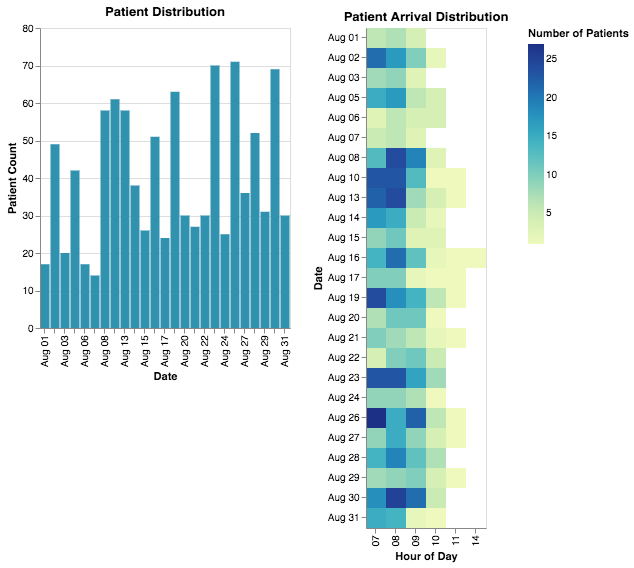

In [1]:
from altair import datum
import altair as alt
import pandas as pd

data = pd.read_csv('data/queue_data.csv', parse_dates=[['QDate', 'QTime']])

# Use only necessary labels, i.e valid patients
patients = data.loc[:,['QDate_QTime','Queue No', 'index', 'Valid']]

heatmap = alt.Chart(patients).mark_rect().encode(
    y=alt.Y('monthdate(QDate_QTime):O', title='Date'),
    x=alt.X('hours(QDate_QTime):O', title='Hour of Day'),
    color=alt.Color('distinct(Queue No):N', title='Number of Patients'),
    tooltip=[
        alt.Text('distinct(Queue No):N', title='# of Patients')
    ]
).transform_filter(
    (datum.index == 0) &
    (datum.Valid == 'Y')
)

barchart = alt.Chart(patients).mark_bar(color='#3192b0').encode(
    y=alt.Y('distinct(Queue No):N', title='Patient Count'),
    x=alt.X('monthdate(QDate_QTime):O', title='Date'),
    tooltip=[
        alt.Text('monthdate(QDate_QTime):O', title='Date'),
        alt.Text('distinct(Queue No):N', title='# of Patients')
    ]
).transform_filter(
    (datum.index == 0) &
    (datum.Valid == 'Y')
)

alt.hconcat(
    barchart.properties(title='Patient Distribution', width=250),
    heatmap.properties(title='Patient Arrival Distribution')
)


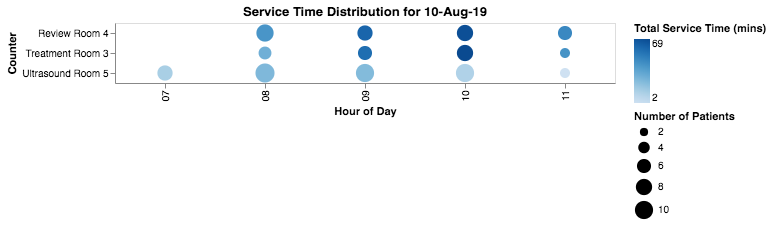

In [2]:
from altair import datum
import altair as alt
import pandas as pd

data = pd.read_csv('data/queue_data.csv', parse_dates=[['QDate', 'Start']])

# Manually set for now. format(%d-%b-%y), i.e 4-Aug-19
# TODO: use range select or dropdown
select_date = '10-Aug-19'

# Use only necessary labels, i.e valid patients
data = data.loc[:,['QDate_Start','Queue No', 'Counter', 'ST', 'Valid']]

# Filter by date
patients = data[data['QDate_Start'].str.contains(select_date)]

heatmap = alt.Chart(patients).mark_circle().encode(
    y=alt.Y('Counter', title='Counter'),
    x=alt.X('hours(QDate_Start):O', title='Hour of Day'),
    size=alt.Size('distinct(Queue No):N', title='Number of Patients'),
    color=alt.Color('sum(ST):Q', title='Total Service Time (mins)'),
    tooltip=[
        alt.Text('distinct(Queue No):N', title='# of Patients'),
        alt.Text('sum(ST):Q', title='Total Svc Time')
    ]
).transform_filter(
    (datum.Counter != None) &
    (datum.Valid == 'Y')
)
                   
alt.hconcat(
    heatmap.properties(title='Service Time Distribution for ' + select_date, width=500)
)

